Importing the dependencies

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from sklearn import svm
from sklearn.model_selection import train_test_split


Data collection and analysis

In [4]:
df = pd.read_csv("diabetes.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.Outcome.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

In [6]:
df.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Split the data to train and test data

In [7]:
X = df.drop(columns='Outcome', axis = 1)
y = df["Outcome"]
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


Data Standardization

In [8]:
scaler = StandardScaler()

scaler = scaler.fit(X)
X_data_scaler = scaler.transform(X)
print(X_data_scaler)

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]


In [9]:
X = X_data_scaler # type: ignore
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,stratify=y, random_state=2)

print(X.shape,X_train.shape,X_test.shape)


(768, 8) (614, 8) (154, 8)


Model Training

In [10]:
model = svm.SVC(kernel='linear')

In [11]:
model.fit(X_train,y_train)

SVC(kernel='linear')

Model Evaluation

In [12]:
# Accuracy for training
accuracy_score_train = accuracy_score(y_train, model.predict(X_train))
print(f"The accuracy on training is  {accuracy_score_train:.2f}")

The accuracy on training is  0.79


In [13]:
# Accuracy for testing
y_pred = model.predict(X_test)
accuracy_score_test = accuracy_score(y_test,y_pred)
print(f"The accuracy on testing is  {accuracy_score_test:.2f}")

The accuracy on testing is  0.77


Confusion matrix

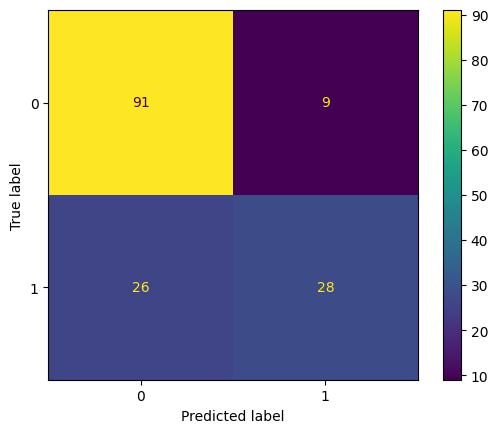

In [14]:
matrix = confusion_matrix(y_test,y_pred)
ConfusionMatrixDisplay(matrix).plot()

Making a predictive system

In [15]:
input_data = (2,197,70,45,543,30.5,0.158,53)
# Changing the data to numpy array
input_data_as_np_array = np.asarray(input_data)

# Reshape the array predicting one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

# standarized the data
std_data = scaler.transform(input_data_reshaped)
print(std_data)


# Prediction
prediction = model.predict(std_data)
print(prediction)


if prediction[0] == 1:
    print('The person is diabetic')
else:
    print('The person is non diabetic')



[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]
[1]
The person is diabetic


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


Saving the trained model

In [16]:
import pickle

In [18]:
filename = 'trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [20]:
# Loading the save model
loaded_model = pickle.load(open('trained_model.sav','rb'))

In [21]:
input_data = (2,197,70,45,543,30.5,0.158,53)
# Changing the data to numpy array
input_data_as_np_array = np.asarray(input_data)

# Reshape the array predicting one instance
input_data_reshaped = input_data_as_np_array.reshape(1,-1)

# standarized the data
std_data = scaler.transform(input_data_reshaped)
print(std_data)


# Prediction
prediction = loaded_model.predict(std_data)
print(prediction)


if prediction[0] == 1:
    print('The person is diabetic')
else:
    print('The person is non diabetic')

[[-0.54791859  2.38188392  0.04624525  1.53455054  4.02192191 -0.18943689
  -0.94794368  1.68125866]]
[1]
The person is diabetic


c:\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
